In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words = 50000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]#training data is a list of tokenized integers ie each integer represents a word's token

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()#this will be a dictionary of words-token
index_word = dict()
for key,value in word_index.items():
    index_word.update({value:key})

In [7]:
def convert_token_to_word(arr_of_ints):
    text = ""
    for tkn in arr_of_ints:
        text+=index_word[tkn]
        text+=" "
    return text
convert_token_to_word(test_data[0])

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs '

In [41]:
train_label[0]
#index_word[1]
len(train_data)

8982

In [45]:
#one hot encoding the input data
import numpy as np
def one_hot_encode(input):
    tensr = np.zeros((len(input),50000),dtype = int)#rows = no of news articles(batch-size) and columns include the one-hot-encoding of the words in a review
    for i in range(len(input)):
        for j in input[i]:
            tensr[i,j] = 1
    return tensr
x_train = one_hot_encode(train_data)
print(x_train.shape)
x_test = one_hot_encode(test_data)

(8982, 50000)


In [46]:
#one hot encoding labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)


In [76]:
#16 hidden units maybe bottleneck to relevant information hence we will use 64 units
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation = "relu",input_shape = (50000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation = "softmax"))#hence output will be a 46 dimensional vector


In [77]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [78]:
x_validation = x_train[:1000]
y_validation = y_train[:1000]
partial_xtrain = x_train[1000:]
print(partial_xtrain.shape)
partial_ytrain = y_train[1000:]
print(partial_ytrain.shape)

(7982, 50000)
(7982, 46)


In [79]:
history = model.fit(partial_xtrain,partial_ytrain,epochs = 20,batch_size=512,validation_data=(x_validation,y_validation))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 799us/step - loss: 3.2179 - acc: 0.4186 - val_loss: 2.4019 - val_acc: 0.5410
Epoch 2/20
7982/7982 [==============================] - 5s 617us/step - loss: 1.8872 - acc: 0.6079 - val_loss: 1.5847 - val_acc: 0.6440
Epoch 3/20
7982/7982 [==============================] - 5s 621us/step - loss: 1.3367 - acc: 0.7046 - val_loss: 1.3248 - val_acc: 0.6960
Epoch 4/20
7982/7982 [==============================] - 5s 642us/step - loss: 1.0158 - acc: 0.7752 - val_loss: 1.1487 - val_acc: 0.7560
Epoch 5/20
7982/7982 [==============================] - 5s 682us/step - loss: 0.7526 - acc: 0.8355 - val_loss: 1.0342 - val_acc: 0.7770
Epoch 6/20
7982/7982 [==============================] - 6s 703us/step - loss: 0.5420 - acc: 0.8820 - val_loss: 0.9953 - val_acc: 0.7870
Epoch 7/20
7982/7982 [==============================] - 5s 681us/step - loss: 0.3929 - acc: 0.9206 - val_loss: 0.9580 - val_acc: 0.8040


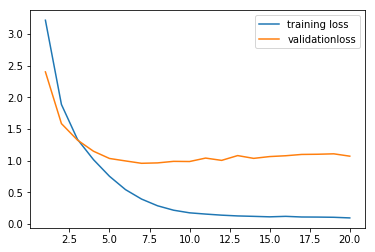

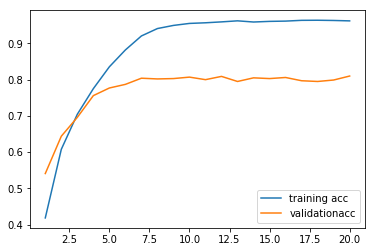

In [80]:
import matplotlib.pyplot as plt
history_dict = history.history
def plotting(epochs,y1,y2,data):
    x = [i for i in range(1,epochs+1)]
    plt.plot(x,y1,label = "training {}".format(data))
    plt.plot(x,y2,label = "validation{}".format(data))
    plt.legend()
    plt.show()
plotting(20,[x for x in history_dict["loss"]],[x for x in history_dict["val_loss"]],"loss")
plotting(20,history_dict["acc"],history_dict["val_acc"],"acc")
    

In [60]:
convert_token_to_word(test_data[0])

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs '

In [61]:
pred = model.predict(x_test)

In [75]:
np.argmax(pred[0])
pred[0].shape#46 classes per each output

(46,)

In [64]:
train_label[0]

3

In [74]:
def custom_news(article):
    article_arr = article.split(" ")
    int_article = [[word_index[x] for x in article_arr]]
    custom_test = one_hot_encode(int_article)
    return np.argmax(model.predict(custom_test)[0])
custom_news("cocoa cake")
    
    

3